### <strong> Notebook with tests and example usage of module synth </strong>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from synth import oscillators as oscry
from synth import helpers

from synthHelpers import prettyFigures as pf

#### <strong> Sine test </strong>

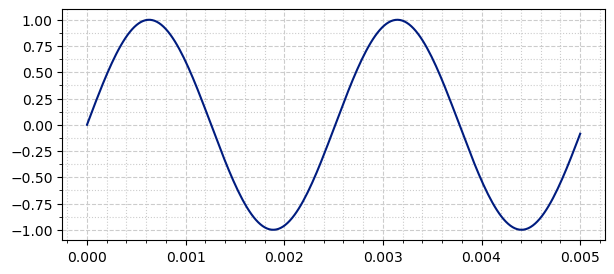

In [4]:
sampl_rate  = 44_100
freq        = 400
phase       = 0
ampl        = 1
duration    = 1
osc = oscry.SineOscillator(freq=freq, phase=0, ampl=1, sampling_rate=sampl_rate, wave_range=(-1, 1))
osc_sig = osc.getValues(simTime=duration)
plotStopTime = 5e-3

osc_sig_plot = osc_sig[0:int(sampl_rate*plotStopTime)]
n = np.linspace(0, plotStopTime, osc_sig_plot.shape[-1])

pf.plot( (n, osc_sig_plot),
        major_ticks=(0.001,0.25),
        minor_ticks=(5, 2),
        label='sine wave',
        _figsize=(7, 3))
plt.show()

# Save
# helpers.saveWave(wave1=osc, wave2=None, fname=f'test_sine{freq}hz.wav', ampl=1, simTime=3)

#### <strong> Square test </strong>

In [9]:
sampl_rate  = 44_100
freq        = 400
phase       = 0
ampl        = 0.05
duration    = 1
osc = oscry.SquareOscillator(freq=freq, phase=0, ampl=ampl, sampling_rate=sampl_rate, wave_range=(-1, 1))
osc_sig = osc.getValues(simTime=duration)
plotStopTime = 5e-3

osc_sig_plot = osc_sig[0:int(sampl_rate*plotStopTime)]
n = np.linspace(0, plotStopTime, osc_sig_plot.shape[-1])

pf.plot( (n, osc_sig_plot),
        major_ticks=(0.001,0.25),
        minor_ticks=(5, 2),
        label='sine wave',
        _figsize=(7, 3))
plt.show()

# Save
# helpers.saveWave(wave1=osc, wave2=None, fname=f'test_square{freq}hz.wav', ampl=1, simTime=duration)

#### <strong> Sawtooth test </strong>

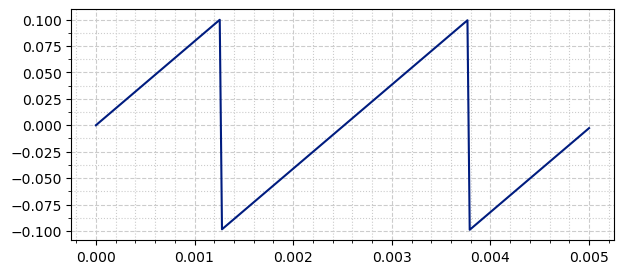

In [34]:
sampl_rate  = 44_100
freq        = 400
phase       = 0
ampl        = 0.1
duration    = 1
osc = oscry.SawtoothOscillator(freq=freq, phase=0, ampl=ampl, sampling_rate=sampl_rate, wave_range=(-1, 1))
osc_sig = osc.getValues(simTime=duration)

plotStopTime = 5e-3

osc_sig_plot = osc_sig[0:int(sampl_rate*plotStopTime)]
n = np.linspace(0, plotStopTime, osc_sig_plot.shape[-1])

# plot
xmajor = plotStopTime/5
ymajor = ampl/4
pf.plot( (n, osc_sig_plot),
        major_ticks=(xmajor, ymajor),
        minor_ticks=(5, 2),
        label='sawtooth wave',
        _figsize=(7, 3))
plt.show()

# helpers.saveWave(wave1=osc, wave2=None, fname=f'test_sawtooth{freq}hz.wav', ampl=1, simTime=duration)

#### <strong> Triangle test </strong>

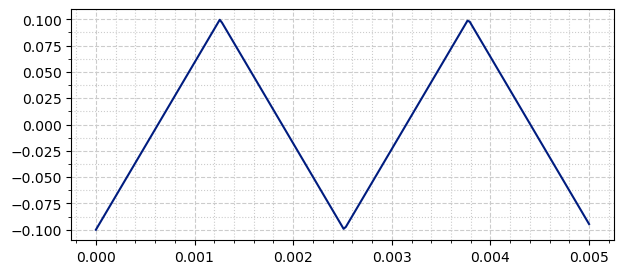

In [3]:
sampl_rate  = 44_100
freq        = 400
phase       = 0
ampl        = 0.1
duration    = 1
osc = oscry.TriangleOscillator(freq=freq, phase=0, ampl=ampl, sampling_rate=sampl_rate, wave_range=(-1, 1))
osc_sig = osc.getValues(simTime=duration)

plotStopTime = 5e-3

osc_sig_plot = osc_sig[0:int(sampl_rate*plotStopTime)]
n = np.linspace(0, plotStopTime, osc_sig_plot.shape[-1])

# plot
xmajor = plotStopTime/5
ymajor = ampl/4
pf.plot( (n, osc_sig_plot),
        major_ticks=(xmajor, ymajor),
        minor_ticks=(5, 2),
        label='sawtooth wave',
        _figsize=(7, 3))
plt.show()

helpers.saveWave(wave1=osc, wave2=None, fname=f'test_trianle{freq}hz.wav', ampl=1, simTime=duration)

#### <strong> Sine with spectrum test </strong> 

In [ ]:
sampl_rate  = 44_100
freq        = 400
phase       = 0
ampl        = 2
duration    = 1
osc = oscry.SineOscillator(freq=freq, phase=0, ampl=ampl, sampling_rate=sampl_rate, wave_range=(-1, 1))
osc_sig = osc.getValues(simTime=duration)
plotStopTime = 5e-3

osc_sig_plot = osc_sig[0:int(sampl_rate*plotStopTime)]
n = np.linspace(0, plotStopTime, osc_sig_plot.shape[-1])

# Time domain plot
xmajor = plotStopTime/5
ymajor = ampl/4
pf.plot( (n, osc_sig_plot),
        major_ticks=(xmajor, ymajor),
        minor_ticks=(5, 2),
        label='sine wave',
        _figsize=(7, 3))
plt.show()      

# Spectrum plot
fplot, magplot, phaseplot = helpers.spectrumPlot(osc_sig, spslice=slice(0, 1000), sample_rate=44_100)

fig, ax = plt.subplots(2, 1)
fig.set_size_inches(10, 5)
# fig.tight_layout()

xmajor = (fplot[-1]+1)/4
ymajor = np.max(magplot)/4
ax[0].plot(fplot, magplot)
pf.plotSetup(
        ax[0],
        major_ticks=(xmajor, ymajor),
        minor_ticks=(5, 2),
        xlabel='frequency',
        ylabel='amplitude',
        title='Freq. spectrum')

ymajor = np.max(phaseplot)/4
ax[1].plot(fplot, phaseplot)
pf.plotSetup(
        ax[1],
        major_ticks=(xmajor, ymajor),
        minor_ticks=(5, 2),
        xlabel='frequency',
        ylabel='Phase',
        title='Phase spectrum')

plt.show()
# # Save
# helpers.saveWave(wave1=osc, wave2=None, fname=f'test_sine{freq}hz.wav', ampl=1, simTime=3)

#### <strong> Porównanie spektrum </strong>

In [ ]:
freq = 100; fslice = slice(80, 800)

fig, axes = plt.subplots(1, 4)
fig.set_size_inches(10, 3)
ax1, ax2, ax3, ax4 = axes

osc = oscry.SineOscillator(freq=freq)
osc_sig = osc.getValues(simTime=1)
fplot, magplot, phaseplot = helpers.spectrumPlot(osc_sig, spslice=fslice, sample_rate=44_100)
pf.plot2((fplot, magplot), ax=ax1, title='sine osciallator', xlabel='frequency', ylabel='amplitude')

osc = oscry.SquareOscillator(freq=freq)
osc_sig = osc.getValues(simTime=1)
fplot, magplot, phaseplot = helpers.spectrumPlot(osc_sig, spslice=fslice, sample_rate=44_100)
pf.plot2((fplot, magplot), ax=ax2, title='square osciallator', xlabel='frequency')

osc = oscry.SawtoothOscillator(freq=freq)
osc_sig = osc.getValues(simTime=1)
fplot, magplot, phaseplot = helpers.spectrumPlot(osc_sig, spslice=fslice, sample_rate=44_100)
pf.plot2((fplot, magplot), ax=ax3, title='sawtooth osciallator', xlabel='frequency')

osc = oscry.TriangleOscillator(freq=freq)
sc_sig = osc.getValues(simTime=1)
fplot, magplot, phaseplot = helpers.spectrumPlot(osc_sig, spslice=fslice, sample_rate=44_100)
pf.plot2((fplot, magplot), ax=ax4, title='triangle osciallator', xlabel='frequency')

plt.show()

####  <strong> Test dodawania z iteratorów </strong> 

In [205]:
x1 = oscry.SineOscillator(freq=100)
x2 = oscry.SineOscillator(freq=100)

osc_tors = [x1, x2]
[iter(osc) for osc in osc_tors]


In [211]:
s1 = [next(osc) for osc in osc_tors]
print(s1)
print(sum(s1))

[0.07117769039544068, 0.07117769039544068]
0.14235538079088136


#### <strong> Test waveAdder </strong>

In [12]:
from synth import signalOperations as sigop

In [13]:
osc1 = oscry.SineOscillator(freq=2, ampl=2)
osc2 = oscry.SineOscillator(freq=2, ampl=1)

oscsum = sigop.WaveAdder(osc1, osc2)

oscsum_sig = oscsum.getValues(1)
osc1sig = osc1.getValues(1)
osc2sig = osc2.getValues(1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 5)
pf.plot2(oscsum_sig, ax=ax, label='sum of sig1 and sig2')
pf.plot2(osc1sig, ax=ax, label='sig1')
pf.plot2(osc2sig, ax=ax, label='sig2')

plt.legend(loc='upper right')
plt.show()

AttributeError: 'WaveAdder' object has no attribute 'getValues'